In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [2]:
loadConsumption = pd.read_csv('processed_data/data_2006_2023.csv')

In [3]:
# %load 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')
loadConsumption = pd.read_csv('processed_data/data_2006_2023.csv')

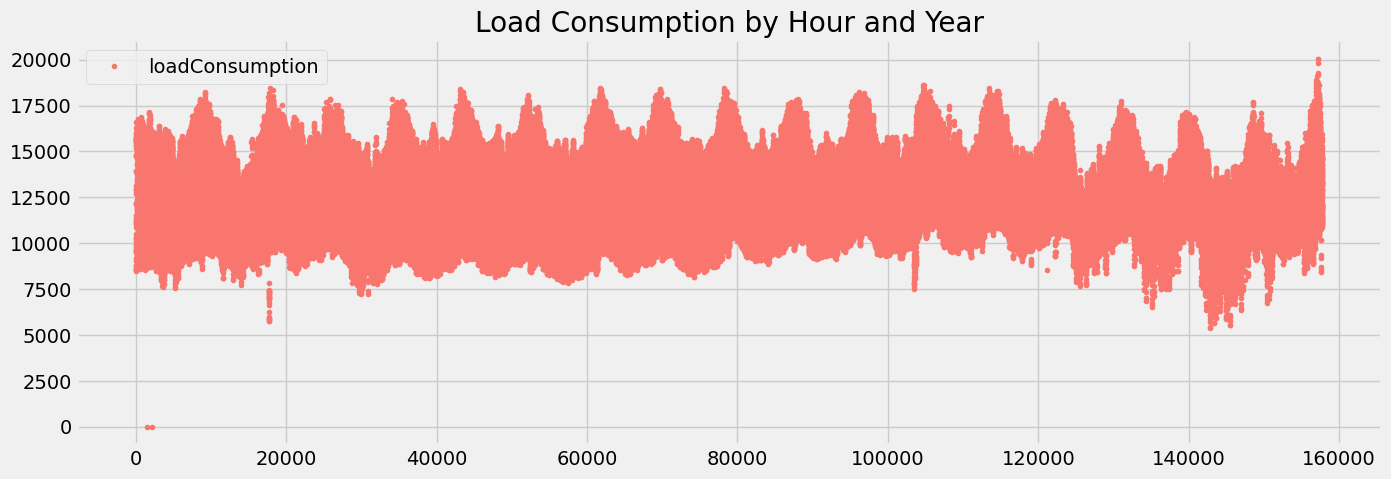

In [4]:
color_pal = ["#F8766D", "#3D3200", "#93AA00", "#00BA38", "#20C19F", "#619CFF", "#DB72FB"]

loadConsumption[['loadConsumption']].plot(
    style='.', 
    figsize=(15, 5), 
    color=[color_pal[0]],
    title='Load Consumption by Hour and Year'
)
plt.show()


In [5]:
# Ensure 'datetime' column is in datetime format
loadConsumption["datetime"] = pd.to_datetime(loadConsumption["datetime"])

# Set 'datetime' as index
loadConsumption.set_index("datetime", inplace=True)

# Convert split date
split_date = pd.to_datetime("2018-01-01")

# Ensure index is a DatetimeIndex
print("Index Type Before:", type(loadConsumption.index))

# Perform the filtering
load_train = loadConsumption.loc[loadConsumption.index <= split_date].copy()
load_test = loadConsumption.loc[loadConsumption.index > split_date].copy()

# Verify that index is now correct
print("Index Type After:", type(load_train.index))

Index Type Before: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index Type After: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


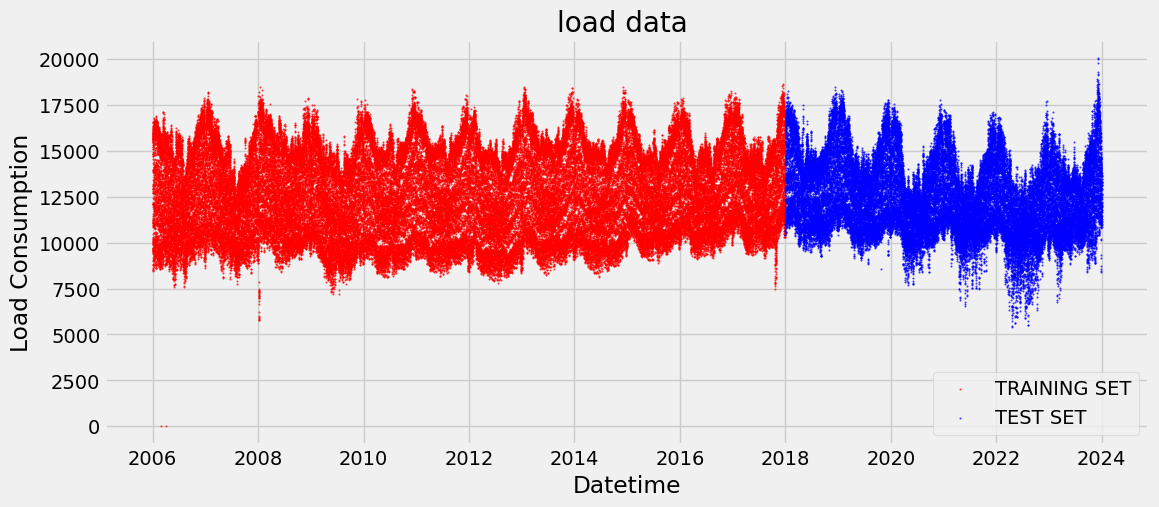

In [6]:
plt.figure(figsize=(12, 5))

# Plot training data in red
plt.scatter(load_train.index, load_train["loadConsumption"], label="TRAINING SET", color="red", s=1, alpha=0.6)

# Plot test data in blue
plt.scatter(load_test.index, load_test["loadConsumption"], label="TEST SET", color="blue", s=1, alpha=0.6)

# Formatting the plot
plt.title("load data ")
plt.xlabel("Datetime")
plt.ylabel("Load Consumption")
plt.legend()
plt.show()


In [13]:
# Ensure 'date' is in datetime format and rename it
if "date" in loadConsumption.columns:
    loadConsumption["datetime"] = pd.to_datetime(loadConsumption["date"])
    loadConsumption.drop(columns=["date"], inplace=True)  # Drop old 'date' column

# Set 'datetime' as index
loadConsumption.set_index("datetime", inplace=True)

# Print columns after fixing
print("Updated Columns:", loadConsumption.columns)

# Now define the split date
split_date = pd.to_datetime("2018-01-01")

# Perform the filtering
load_train = loadConsumption.loc[loadConsumption.index < split_date].copy()
load_test = loadConsumption.loc[loadConsumption.index >= split_date].copy()

# Check columns in train/test sets
print("Columns in load_train:", load_train.columns)
print("Columns in load_test:", load_test.columns)

# Run feature creation again
X_train, y_train = create_features(load_train, label="loadConsumption")
X_test, y_test = create_features(load_test, label="loadConsumption")


Updated Columns: Index(['loadConsumption', 'Hour', 'Year'], dtype='object')
Columns in load_train: Index(['loadConsumption', 'Hour', 'Year'], dtype='object')
Columns in load_test: Index(['loadConsumption', 'Hour', 'Year'], dtype='object')
Column 'datetime' not found. Available columns: Index(['loadConsumption', 'Hour', 'Year'], dtype='object')


TypeError: cannot unpack non-iterable NoneType object

In [12]:
import xgboost as xgb
from xgboost import plot_importance


In [17]:
# Convert datasets to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Define XGBoost parameters
params = {
    "objective": "reg:squarederror",
    "learning_rate": 0.1,
    "max_depth": 5,
    "eval_metric": "rmse"
}

# Train the model using DMatrix
reg = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dval, "validation")],
    early_stopping_rounds=50,
    verbose_eval=True
)


[0]	validation-rmse:1919.33232
[1]	validation-rmse:1751.88829
[2]	validation-rmse:1605.61984
[3]	validation-rmse:1480.02836
[4]	validation-rmse:1364.34932
[5]	validation-rmse:1262.31794
[6]	validation-rmse:1173.20487
[7]	validation-rmse:1099.67364
[8]	validation-rmse:1036.06054
[9]	validation-rmse:981.78135
[10]	validation-rmse:937.25741
[11]	validation-rmse:892.30222
[12]	validation-rmse:860.49565
[13]	validation-rmse:834.08759
[14]	validation-rmse:809.34326
[15]	validation-rmse:791.30601
[16]	validation-rmse:779.46336
[17]	validation-rmse:764.24450
[18]	validation-rmse:755.84300
[19]	validation-rmse:747.86255
[20]	validation-rmse:739.66197
[21]	validation-rmse:734.73094
[22]	validation-rmse:728.62242
[23]	validation-rmse:724.64708
[24]	validation-rmse:721.03442
[25]	validation-rmse:719.41628
[26]	validation-rmse:718.17176
[27]	validation-rmse:715.30947
[28]	validation-rmse:715.50850
[29]	validation-rmse:713.18408
[30]	validation-rmse:711.67074
[31]	validation-rmse:706.12433
[32]	vali

[0]	validation-rmse:1919.33232
[1]	validation-rmse:1751.88829
[2]	validation-rmse:1605.61984
[3]	validation-rmse:1480.02836
[4]	validation-rmse:1364.34932
[5]	validation-rmse:1262.31794
[6]	validation-rmse:1173.20487
[7]	validation-rmse:1099.67364
[8]	validation-rmse:1036.06054
[9]	validation-rmse:981.78135
[10]	validation-rmse:937.25741
[11]	validation-rmse:892.30222
[12]	validation-rmse:860.49565
[13]	validation-rmse:834.08759
[14]	validation-rmse:809.34326
[15]	validation-rmse:791.30601
[16]	validation-rmse:779.46336
[17]	validation-rmse:764.24450
[18]	validation-rmse:755.84300
[19]	validation-rmse:747.86255
[20]	validation-rmse:739.66197
[21]	validation-rmse:734.73094
[22]	validation-rmse:728.62242
[23]	validation-rmse:724.64708
[24]	validation-rmse:721.03442
[25]	validation-rmse:719.41628
[26]	validation-rmse:718.17176
[27]	validation-rmse:715.30947
[28]	validation-rmse:715.50850
[29]	validation-rmse:713.18408
[30]	validation-rmse:711.67074
[31]	validation-rmse:706.12433
[32]	vali

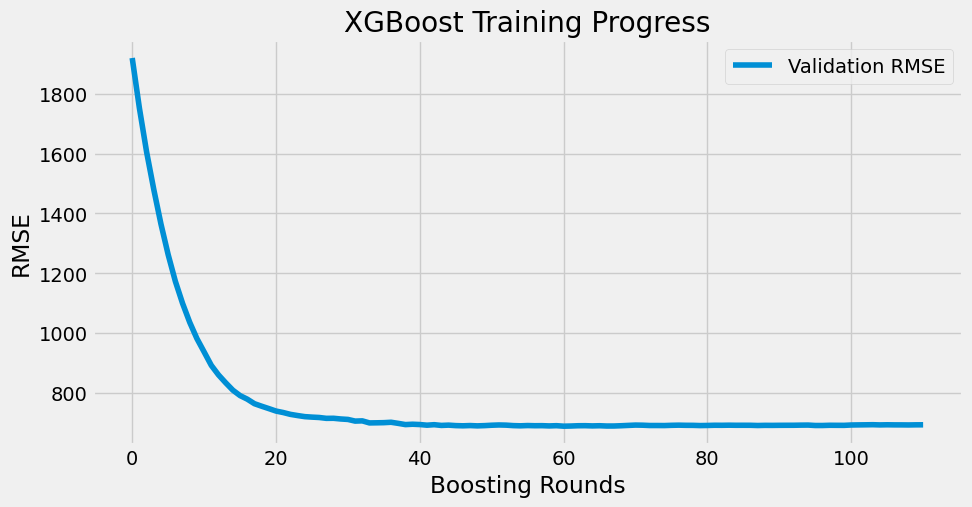

In [24]:
# Define a dictionary to store evaluation results
evals_result = {}

# Train the model using DMatrix
reg = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dval, "validation")],
    early_stopping_rounds=50,
    evals_result=evals_result,  # Store results
    verbose_eval=True
)

# Extract RMSE values correctly
epochs = len(evals_result['validation']['rmse'])

# Plot RMSE over iterations
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(epochs), evals_result['validation']['rmse'], label='Validation RMSE')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('XGBoost Training Progress')
plt.legend()
plt.show()


C:\Users\mahmo\AppData\Local\Temp\ipykernel_1512\1909964102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = reg.predict(dtest)


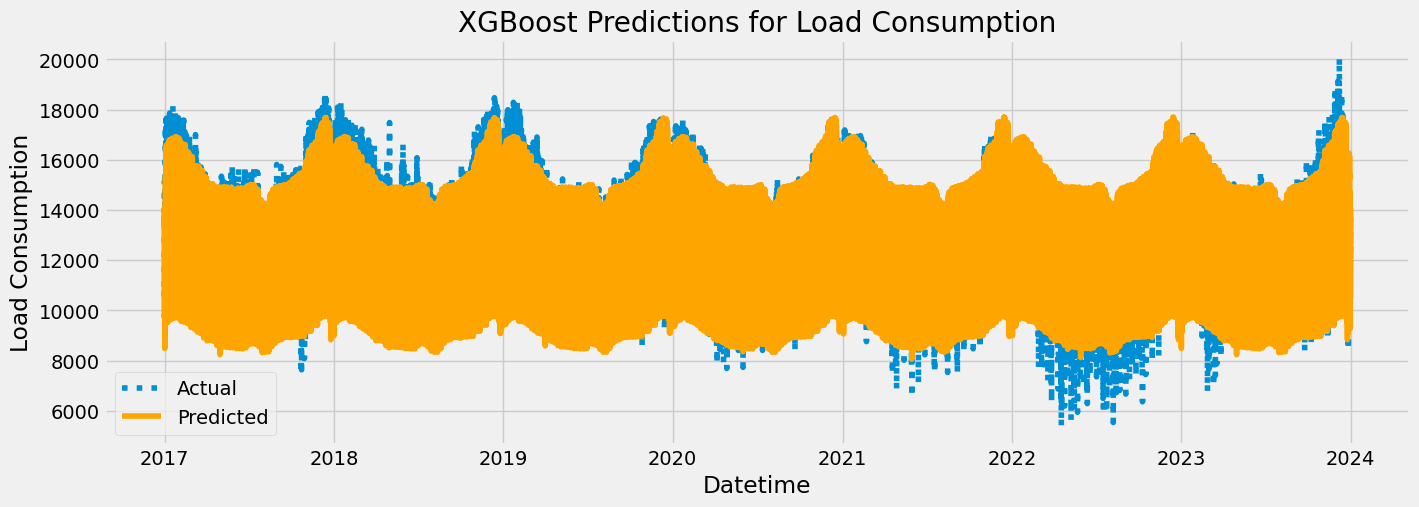

In [20]:
# Convert test set into DMatrix format
dtest = xgb.DMatrix(X_test)

# Make predictions
test['Prediction'] = reg.predict(dtest)

# Plot actual vs predicted values
plt.figure(figsize=(15, 5))
plt.plot(test.index, test['loadConsumption'], label='Actual', linestyle='dotted')
plt.plot(test.index, test['Prediction'], label='Predicted', color='orange')

plt.title("XGBoost Predictions for Load Consumption")
plt.xlabel("Datetime")
plt.ylabel("Load Consumption")
plt.legend()
plt.show()


In [21]:
# Compute errors
rmse = mean_squared_error(y_test, test['Prediction'], squared=False)
mae = mean_absolute_error(y_test, test['Prediction'])

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, test['Prediction'])

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 1501.97
MAE: 1061.00
MAPE: 9.16%


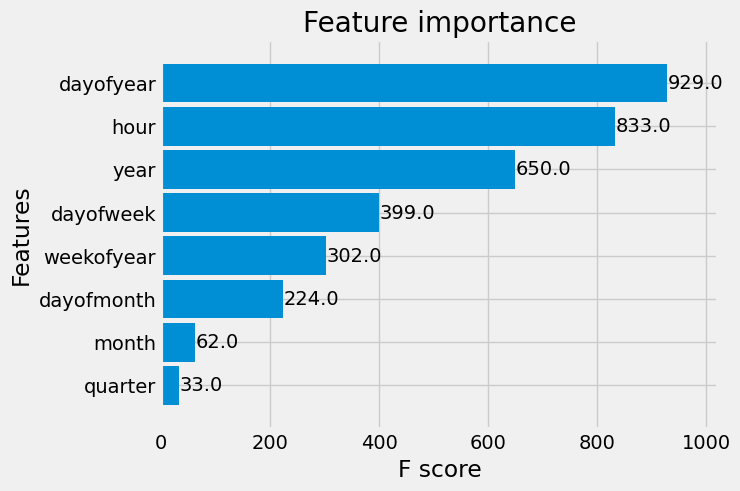

In [22]:
xgb.plot_importance(reg, height=0.9)
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.3],
    "n_estimators": [500, 1000, 1500],
    "subsample": [0.8, 1.0]
}

# Initialize GridSearch
grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective="reg:squarederror"),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2
)

# Run grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1.0; total time=  

In [25]:
{
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 1000,
    'subsample': 0.8
}


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.8}

In [28]:
# Define best parameters
best_params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 1000,
    'subsample': 0.8,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'  # This must be inside params
}


# Convert datasets to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Train using xgb.train()
reg = xgb.train(
    params=best_params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dval, "validation")],
    early_stopping_rounds=50,
    verbose_eval=True
)


[0]	validation-rmse:1944.89552
[1]	validation-rmse:1802.05155
[2]	validation-rmse:1674.69311
[3]	validation-rmse:1567.08204
[4]	validation-rmse:1472.03837
[5]	validation-rmse:1392.92024
[6]	validation-rmse:1325.61858
[7]	validation-rmse:1272.08574
[8]	validation-rmse:1224.17362
[9]	validation-rmse:1170.54404
[10]	validation-rmse:1134.70426
[11]	validation-rmse:1095.31830
[12]	validation-rmse:1066.00621
[13]	validation-rmse:1043.99348
[14]	validation-rmse:1014.83970
[15]	validation-rmse:998.79757


C:\Users\mahmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:03:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[16]	validation-rmse:976.59270
[17]	validation-rmse:962.92820
[18]	validation-rmse:938.61166
[19]	validation-rmse:926.28564
[20]	validation-rmse:905.68158
[21]	validation-rmse:895.19404
[22]	validation-rmse:878.76123
[23]	validation-rmse:873.07009
[24]	validation-rmse:859.17124
[25]	validation-rmse:846.21119
[26]	validation-rmse:842.62416
[27]	validation-rmse:830.98890
[28]	validation-rmse:828.82917
[29]	validation-rmse:819.07031
[30]	validation-rmse:812.77775
[31]	validation-rmse:803.01353
[32]	validation-rmse:790.67722
[33]	validation-rmse:789.47299
[34]	validation-rmse:790.51752
[35]	validation-rmse:782.89932
[36]	validation-rmse:773.98412
[37]	validation-rmse:776.03121
[38]	validation-rmse:770.63990
[39]	validation-rmse:762.06082
[40]	validation-rmse:753.70765
[41]	validation-rmse:751.44434
[42]	validation-rmse:754.57087
[43]	validation-rmse:748.01920
[44]	validation-rmse:749.68545
[45]	validation-rmse:747.61408
[46]	validation-rmse:743.54748
[47]	validation-rmse:740.90133
[48]	val

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions
y_pred = reg.predict(X_test)

# Compute errors
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'pandas.core.frame.DataFrame'>)

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test, label="Actual", linestyle="dotted")
plt.plot(y_test.index, y_pred, label="Predicted", color="orange")

plt.title("XGBoost Predictions for Load Consumption (Fine-Tuned)")
plt.xlabel("Datetime")
plt.ylabel("Load Consumption")
plt.legend()
plt.show()


In [ ]:
xgb.plot_importance(reg, height=0.9)
plt.show()
